In [10]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

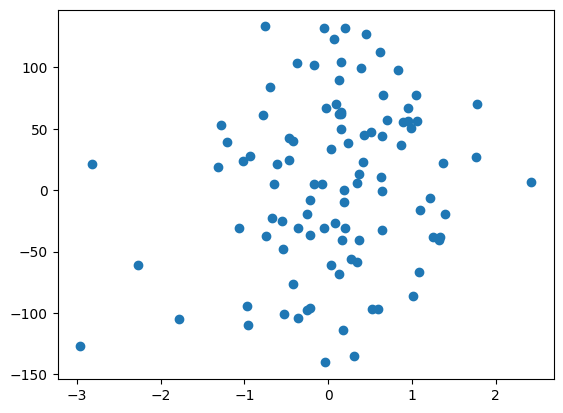

In [17]:
x,y= make_regression(n_samples=100, n_features=2, noise=10) # nous créons des matrice x et y rempli de 100 ligne et d'une colone chacun
plt.scatter(x[:,0],y)# nous trace la courbe

In [18]:
y=y.reshape(100,1)# redimesionne la trice y  à cause de l'erreur de make regression
print(x.shape)
print(y.shape)

(100, 2)
(100, 1)


In [19]:
X = np.hstack((x, np.ones((x.shape[0],1))))# crer la matice X constituer de plusieurs ligne et 2 colonne avec une 2 eme colomne rempli de 1 
print(X.shape)
print(X[:10])

(100, 3)
[[ 0.1959186  -0.14294464  1.        ]
 [-0.64091284  0.12846934  1.        ]
 [-0.74601926 -0.23714384  1.        ]
 [-0.46118     0.89333301  1.        ]
 [ 1.39439993 -0.61620139  1.        ]
 [-0.54012012 -0.50163532  1.        ]
 [ 0.64011306  0.60356354  1.        ]
 [-0.22129936 -1.24755288  1.        ]
 [ 0.34922422 -0.08378837  1.        ]
 [-1.06171826 -0.34597804  1.        ]]


In [20]:
theta = np.random.randn(3,1) # crée le a et b du vecteur theta de manière aléatoire
theta

array([[-0.09875298],
       [ 0.61951428],
       [-0.47529883]])

# Model

In [21]:
def model(X, theta):
    return X.dot(theta)

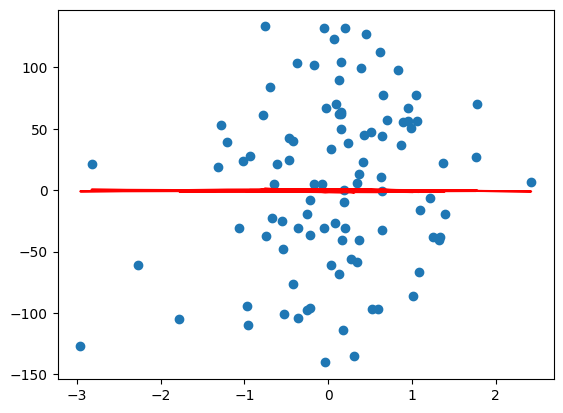

In [22]:
plt.scatter(x[:,0],y)
plt.plot(x[:,0],model(X, theta), c='r')


In [23]:
def cost_function(X , y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)- y)**2)

In [24]:
cost_function(X, y, theta)

2288.5365636701345

# gradients  

In [25]:
def grad (X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

# decente de gradient

In [26]:
def gradient_descent(X, y, theta, learning_rate, n_iteration):
    cost_history = np.zeros(n_iteration)
    for i in range(0, n_iteration):
        theta = theta - learning_rate * grad(X, y, theta)
    return theta, cost_history

# Machine learning

In [27]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate = 0.1, n_iteration=1000) # ajutement des variables a et b de theta

In [28]:
theta_final

array([[16.37967112],
       [63.17578335],
       [ 0.74481635]])

Text(0.5, 0, 'temps')

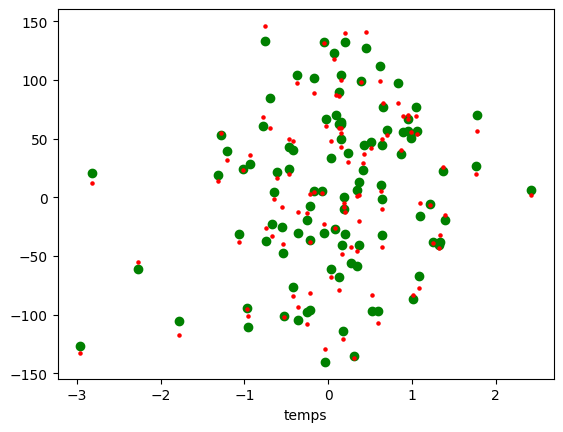

In [29]:
predictions = model (X, theta_final)
plt.scatter(x[:,0],y,c='g')
plt.scatter(x[:,0], predictions, c='r', s=5)
plt.xlabel('temps')

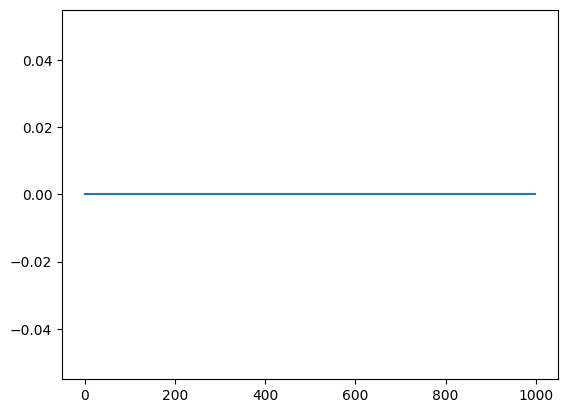

In [30]:
plt.plot(range(1000), cost_history)

# Coeficiant de détermintion r² 

In [31]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()

    v = ((y-y.mean())**2).sum()
    return 1 -u/v

In [209]:
coef_determination(y,predictions)

0.8040520851103545

In [191]:
#from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
#fig = plt.figure()
#ax  = fig.add_subplot(111, projection='3d')
#ax.scatter(x[:,0],x[:,1],y)
#ax.scatter(x[:,0],x[:,1],predictions)